In [1]:
import zipfile
import pandas as pd
import os

In [2]:
# حدد مسار الملف .zip
zip_file_path = '/content/online+retail (1).zip'

# افتح ملف الـ .zip
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # استخرج اسم ملف Excel داخل ملف .zip
    excel_file_name = z.namelist()[0]  # تأكد من أن هذا هو ملف Excel المناسب
    # اقرأ ملف Excel باستخدام Pandas
    with z.open(excel_file_name) as f:
        retail = pd.read_excel(f)

# عرض أول 5 أسطر من البيانات
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
retail.rename(columns={
    'StockCode': 'product_code',
    'Description': 'product_description',
    'UnitPrice': 'price_per_unit',
    'InvoiceNo': 'invoice_number',
    'InvoiceDate': 'transaction_date',
    'Quantity': 'quantity_sold',
    'CustomerID': 'customer_id',
    'Country': 'customer_country'
}, inplace=True)
retail

,invoice_number,product_code,product_description,quantity_sold,transaction_date,price_per_unit,customer_id,customer_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
# تنظيف البيانات
retail['product_description'] = retail['product_description'].str.strip()
retail.dropna(axis=0, subset=['invoice_number'], inplace=True)
retail['invoice_number'] = retail['invoice_number'].astype('str')
retail = retail[~retail['invoice_number'].str.contains('C')]  # إزالة الفواتير الملغاة

In [6]:
# drop duplicate
retail.drop_duplicates(inplace=True)
retail

<ipython-input-6-1b172415ac71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail.drop_duplicates(inplace=True)


,invoice_number,product_code,product_description,quantity_sold,transaction_date,price_per_unit,customer_id,customer_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
basket = (retail
          .groupby(['invoice_number', 'product_description'])['quantity_sold']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_number')
          .astype(int)).applymap(lambda x: 1 if x > 0 else 0)

<ipython-input-7-fc11fb17f142>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .astype(int)).applymap(lambda x: 1 if x > 0 else 0)


In [8]:
basket.head()

product_description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
invoice_number,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.109661,(WHITE HANGING HEART T-LIGHT HOLDER)
92,0.101509,(JUMBO BAG RED RETROSPOT)
294,0.096511,(REGENCY CAKESTAND 3 TIER)
574,0.081809,(PARTY BUNTING)
42,0.075889,(LUNCH BAG RED RETROSPOT)
7,0.070600,(ASSORTED COLOUR BIRD ORNAMENT)
603,0.067204,(SET OF 3 CAKE TINS PANTRY DESIGN)
43,0.064050,(PACK OF 72 RETROSPOT CAKE CASES)
172,0.061769,(LUNCH BAG BLACK SKULL.)
79,0.060605,(NATURAL SLATE HEART CHALKBOARD)


In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("confidence",ascending=False)
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2680,"(JAM MAKING SET PRINTED, SUKI SHOULDER BAG)",(DOTCOM POSTAGE),0.010578,0.034354,0.010141,0.958716,27.907019,0.009778,23.390094,0.974475
1264,"(REGENCY TEA PLATE ROSES, REGENCY TEA PLATE PINK)",(REGENCY TEA PLATE GREEN),0.013053,0.018487,0.012373,0.947955,51.276674,0.012132,18.859070,0.993465
2187,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011500,0.011645,0.010723,0.932489,80.073646,0.010590,14.640003,0.999000
1831,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.012082,0.024844,0.011209,0.927711,37.342173,0.010909,13.489665,0.985123
2186,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011645,0.011500,0.010723,0.920833,80.073646,0.010590,12.486318,0.999147
1504,"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...",(RED RETROSPOT CHARLOTTE BAG),0.012761,0.050172,0.011742,0.920152,18.339859,0.011102,11.895462,0.957696
1265,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE GREEN)",(REGENCY TEA PLATE ROSES),0.013489,0.021593,0.012373,0.917266,42.480761,0.012082,11.825969,0.989812
868,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN),0.014799,0.018487,0.013489,0.911475,49.303403,0.013216,11.087461,0.994434
584,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.016061,0.049250,0.014605,0.909366,18.464153,0.013814,10.489938,0.961280
2802,"(REGENCY TEA PLATE GREEN, ROSES REGENCY TEACUP...",(REGENCY TEA PLATE ROSES),0.011063,0.021593,0.010044,0.907895,42.046747,0.009805,10.622710,0.987138


In [20]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_sorted = rules.sort_values("antecedent support", ascending=False)
rules_sorted = rules.sort_values("consequent support", ascending=False)
rules_sorted = rules.sort_values("support", ascending=False)
rules_sorted = rules.sort_values("confidence", ascending=False)
rules_sorted = rules.sort_values("conviction", ascending=False)
rules_sorted = rules.sort_values("zhangs_metric", ascending=False)
rules_sorted = rules.sort_values("leverage", ascending=False)
rules_sorted = rules.sort_values("lift", ascending=False)
# عرض أعلى 10 قواعد
rules_sorted.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2186,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011645,0.011500,0.010723,0.920833,80.073646,0.010590,12.486318,0.999147
2187,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011500,0.011645,0.010723,0.932489,80.073646,0.010590,14.640003,0.999000
2488,(HERB MARKER PARSLEY),(HERB MARKER THYME),0.011548,0.011500,0.010335,0.894958,77.823583,0.010202,9.410522,0.998684
2489,(HERB MARKER THYME),(HERB MARKER PARSLEY),0.011500,0.011548,0.010335,0.898734,77.823583,0.010202,9.760960,0.998635
2395,(HERB MARKER ROSEMARY),(HERB MARKER PARSLEY),0.011645,0.011548,0.010432,0.895833,77.572391,0.010298,9.489136,0.998740
2394,(HERB MARKER PARSLEY),(HERB MARKER ROSEMARY),0.011548,0.011645,0.010432,0.903361,77.572391,0.010298,10.227322,0.998641
2522,(HERB MARKER PARSLEY),(HERB MARKER MINT),0.011548,0.011645,0.010287,0.890756,76.489986,0.010152,9.047246,0.998457
2523,(HERB MARKER MINT),(HERB MARKER PARSLEY),0.011645,0.011548,0.010287,0.883333,76.489986,0.010152,8.472443,0.998555
2461,(HERB MARKER BASIL),(HERB MARKER ROSEMARY),0.011742,0.011645,0.010384,0.884298,75.935365,0.010247,8.542208,0.998556
2460,(HERB MARKER ROSEMARY),(HERB MARKER BASIL),0.011645,0.011742,0.010384,0.891667,75.935365,0.010247,9.122377,0.998458


In [18]:
from tabulate import tabulate
#طباعةالجدل كامل للمنتجات
print(tabulate(frequent_itemsets, headers='keys', tablefmt='pretty'))
# طباعةالجدل كامل للقواعد
print(tabulate(rules, headers='keys', tablefmt='pretty'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+------+----------------------+-------------------------------------------------------------------------------------------------------------------------------------------------+
|      |       support        |                                                                    itemsets                                                                     |
+------+----------------------+-------------------------------------------------------------------------------------------------------------------------------------------------+
|  0   | 0.10966082779368237  |                                                frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'})                                                |
|  92  | 0.10150904944441749  |                                                     frozenset({'JUMBO BAG RED RETROSPOT'})                                                      |
| 294  | 0.09651123295647533  |                                                     frozenset({'REGENCY CAKEST

# *visualization*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-caed32757289>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


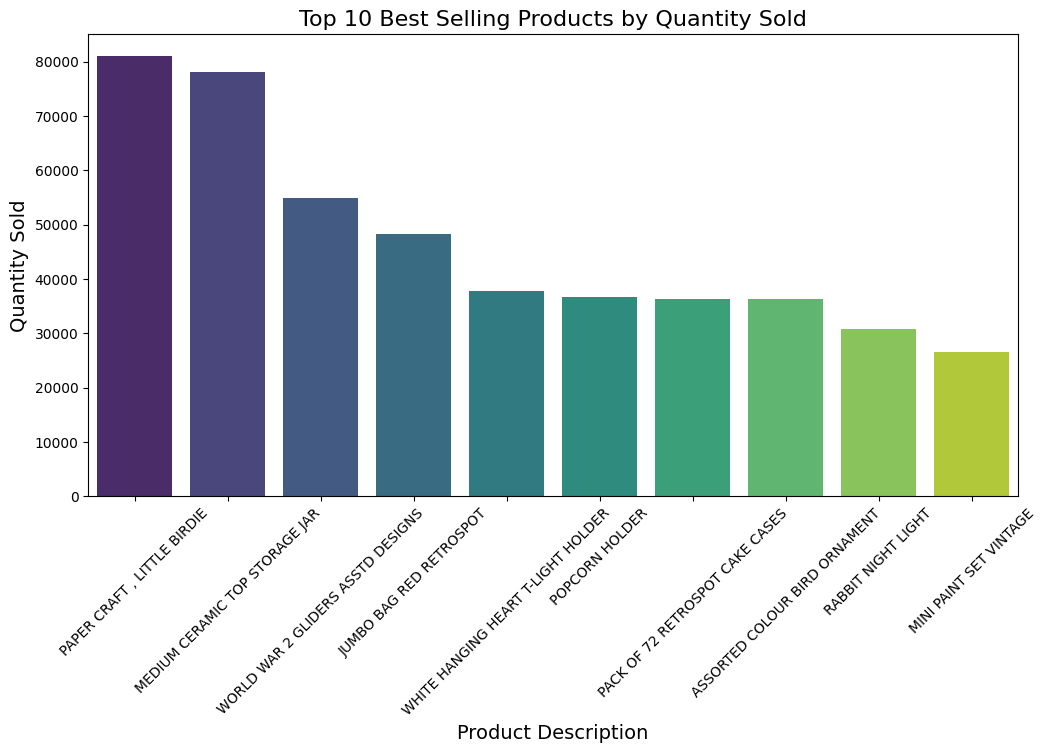

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# أعلى 10 منتجات مبيعًا
top_products = retail.groupby('product_description')['quantity_sold'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Best Selling Products by Quantity Sold', fontsize=16)
plt.xlabel('Product Description', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Top 10 Countries by Sales')

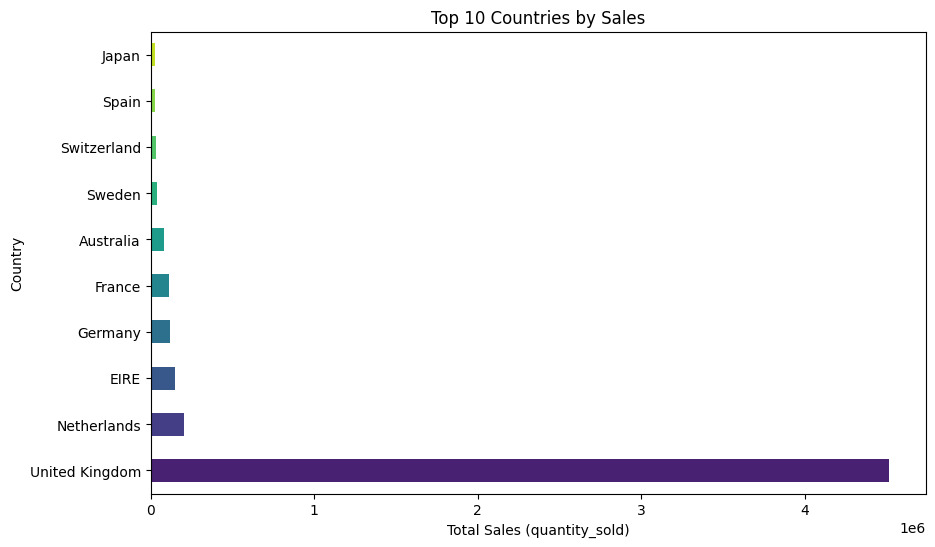

In [22]:
# حساب المبيعات الإجمالية حسب البلد
sales_by_country = retail.groupby('customer_country')['quantity_sold'].sum().sort_values(ascending=False).head(10)

# إعداد قائمة من الألوان باستخدام seaborn color palette أو تعيينها يدويًا
colors = sns.color_palette('viridis', len(sales_by_country))  # استخدام viridis كـ colormap

# رسم مخطط شريطي للمبيعات حسب البلد
plt.figure(figsize=(10,6))
sales_by_country.plot(kind='barh', color=colors)  # تعيين الألوان
plt.xlabel('Total Sales (quantity_sold)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Sales')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-a80403b34453>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['transaction_date'] = pd.to_datetime(retail['transaction_date'])
<ipython-input-23-a80403b34453>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

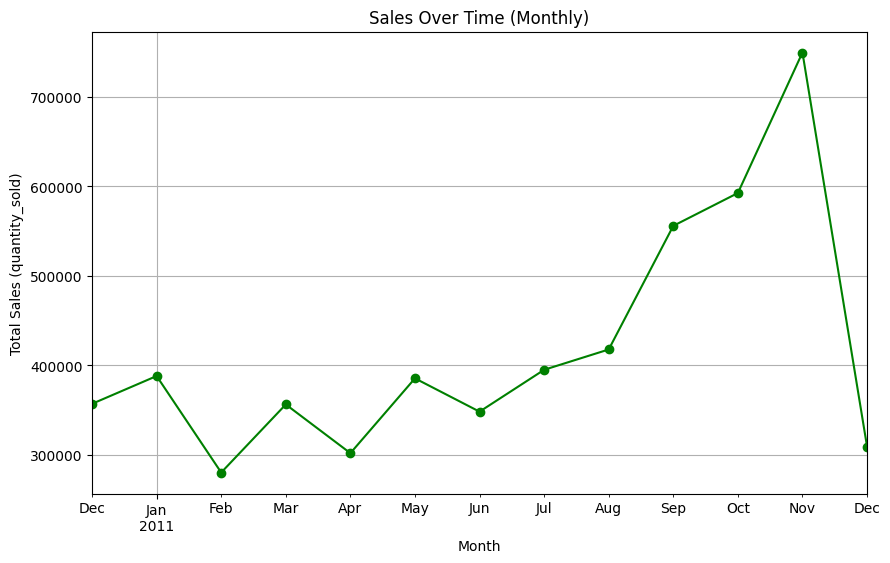

In [23]:
# تحويل العمود 'InvoiceDate' إلى تنسيق datetime
retail['transaction_date'] = pd.to_datetime(retail['transaction_date'])

# إضافة عمود جديد للشهر
retail['Month'] = retail['transaction_date'].dt.to_period('M')

# حساب المبيعات الإجمالية حسب الشهر
sales_by_month = retail.groupby('Month')['quantity_sold'].sum()

# رسم المخطط الزمني للمبيعات
plt.figure(figsize=(10,6))
sales_by_month.plot(kind='line', marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Total Sales (quantity_sold)')
plt.title('Sales Over Time (Monthly)')
plt.grid(True)
plt.show()